In [1]:
# Carrega as bibliotecas
import wget # biblioteca para realizar o download de sites 
import pandas as pd # biblioteca para manipulação de dados e data frames
from zipfile import ZipFile # biblioteca para extrair arquivo zipados
# from plotnine import * # biblioteca para construir o gráfico
import matplotlib.pyplot as plt
import yfinance as yf 

In [2]:
def download_extract_concatenate_dfp_files(start_year, end_year, financial_statements):
    url = "https://dados.cvm.gov.br/dados/CIA_ABERTA/DOC/DFP/DADOS/"
    # Cria uma lista vazia para inserir os nomes dos arquivos zipados
    arquivo_zipado = []

    # Define os nomes dos arquivos zipados de acordo com o range de datas
    for ano in range(start_year, end_year + 1):
        arquivo_zipado.append(f'dfp_cia_aberta_{ano}.zip')

    # Realiza o download dos arquivos zipados de acordo com a url base
    for arquivos in arquivo_zipado:
        wget.download(url + arquivos)

    # Extrai os arquivos zipados 
    for arquivos in arquivo_zipado:
        ZipFile(arquivos, 'r').extractall('DFP')

    # Concatena os dados dos demonstrativos financeiros em um único DataFrame
    for demons in financial_statements:
        arquivo_demonstrativo = pd.DataFrame()
    for ano in range(start_year, end_year + 1):
        arquivo_demonstrativo = pd.concat([arquivo_demonstrativo, pd.read_csv(f'DFP/dfp_cia_aberta_{demons}_{ano}.csv', sep = ';', decimal = ',', encoding = 'ISO-8859-1')]) 
        arquivo_demonstrativo.to_csv(f'dfp_cia_aberta_{demons}_{start_year}-{end_year}.csv', index = False)


In [3]:
def concatena_qqcoisa(start_year, end_year, financial_statements):
    arquivo_zipado = []
    # Define os nomes dos arquivos zipados de acordo com o range de datas
    for ano in range(start_year, end_year + 1):
        arquivo_zipado.append(f'dfp_cia_aberta_{ano}.zip')
    
#     # Extrai os arquivos zipados 
    for arquivos in arquivo_zipado:
        ZipFile(arquivos, 'r').extractall('DFP')

    # Concatena os dados dos demonstrativos financeiros em um único DataFrame
    for demons in financial_statements:
        arquivo_demonstrativo = pd.DataFrame()
    for ano in range(start_year, end_year + 1):
        arquivo_demonstrativo = pd.concat([arquivo_demonstrativo, pd.read_csv(f'DFP/dfp_cia_aberta_{demons}_{ano}.csv', sep = ';', decimal = ',', encoding = 'ISO-8859-1')]) 
        arquivo_demonstrativo.to_csv(f'dfp_cia_aberta_{demons}_{start_year}-{end_year}.csv', index = False)

In [4]:
# concatena_qqcoisa(2010, 2024, ['BPA_con'])

In [5]:
# concatena_qqcoisa(2010, 2024, ['BPP_con'])

In [6]:
bpp = pd.read_csv('dfp_cia_aberta_BPP_con_2010-2024.csv')

In [7]:
bpa = pd.read_csv('dfp_cia_aberta_BPA_con_2010-2024.csv')

In [8]:
bpa

,CNPJ_CIA,DT_REFER,VERSAO,DENOM_CIA,CD_CVM,GRUPO_DFP,MOEDA,ESCALA_MOEDA,ORDEM_EXERC,DT_FIM_EXERC,CD_CONTA,DS_CONTA,VL_CONTA,ST_CONTA_FIXA
0,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2009-12-31,1,Ativo Total,702571987.0,S
1,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2010-12-31,1,Ativo Total,802819794.0,S
2,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2009-12-31,1.01,Caixa e Equivalentes de Caixa,31037881.0,S
3,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2010-12-31,1.01,Caixa e Equivalentes de Caixa,25219700.0,S
4,00.000.000/0001-91,2010-12-31,3,BCO BRASIL S.A.,1023,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2009-12-31,1.01.01,Caixa e Depósitos Bancários,8098625.0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697930,64.904.295/0001-03,2024-02-28,1,CAMIL ALIMENTOS S.A.,24228,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2024-02-28,1.02.04.01.01,Contrato de Concessão,0.0,S
697931,64.904.295/0001-03,2024-02-28,1,CAMIL ALIMENTOS S.A.,24228,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2023-02-28,1.02.04.01.02,Outros intangíveis,1144865.0,N
697932,64.904.295/0001-03,2024-02-28,1,CAMIL ALIMENTOS S.A.,24228,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,ÚLTIMO,2024-02-28,1.02.04.01.02,Outros intangíveis,1104587.0,N
697933,64.904.295/0001-03,2024-02-28,1,CAMIL ALIMENTOS S.A.,24228,DF Consolidado - Balanço Patrimonial Ativo,REAL,MIL,PENÚLTIMO,2023-02-28,1.02.04.02,Goodwill,0.0,S


In [9]:
# Coleta os dados da DRE
#download_extract_concatenate_dfp_files(2010, 2024, ['DRE_con'])

In [10]:
# Realiza a leitura do arquivo
dre = pd.read_csv('dfp_cia_aberta_DRE_con_2010-2024.csv')

In [11]:
# # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
# dados = dre[dre.CD_CONTA.isin(["3.01", # Receita de Venda de Bens e/ou Serviços
# "3.03", # Resultado Bruto
# "3.05", # EBIT
# "3.09", # Lucro/Prejuízo Consolidado do Período
# "3.11" # Lucro/Prejuízo Consolidado do Período
# ]) & dre.CD_CVM.isin([1023]) & (dre.ORDEM_EXERC == 'ÚLTIMO')]
# # Seleciona as colunas
# dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]
 
# # Converte a coluna de data para datetime
# dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])
 
# # Cria a coluna Ano
# dados['Ano'] = dados['DT_REFER'].dt.year

In [12]:
number_stocks=pd.read_csv('number_stocks.csv')

In [13]:
def convert_ticker_to_number(ticker):
    var =number_stocks.loc[number_stocks['Ticker']==ticker]['cvm_code'].values[0]
    return var

In [14]:
def take_number_shares(ticker):
    var =number_stocks.loc[number_stocks['Ticker']==ticker]['acoes'].values[0]
    return var

In [15]:
def pega_dre(ticker_num):
        # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
        dados = dre[dre.CD_CONTA.isin(["3.01", # Receita de Venda de Bens e/ou Serviços
        "3.03", # Resultado Bruto
        "3.05", # EBIT
        "3.09", # Lucro/Prejuízo Consolidado do Período
        "3.11" # Lucro/Prejuízo Consolidado do Período
        ]) & dre.CD_CVM.isin([ticker_num]) & (dre.ORDEM_EXERC == 'ÚLTIMO')]
        # Seleciona as colunas
        dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]

        # Converte a coluna de data para datetime
        dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])

        # Cria a coluna Ano
        dados['Ano'] = dados['DT_REFER'].dt.year
        return dados

In [16]:
def pega_bpp(ticker_num):
        # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
        dados = bpp[bpp.CD_CONTA.isin(["2", # Passivo total
                                        "2.03" #Patrimônio Liquido consolidado
        ]) & bpp.CD_CVM.isin([ticker_num]) & (bpp.ORDEM_EXERC == 'ÚLTIMO')]
        # Seleciona as colunas
        dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]

        # Converte a coluna de data para datetime
        dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])

        # Cria a coluna Ano
        dados['Ano'] = dados['DT_REFER'].dt.year
        return dados

In [17]:
def pega_bpa(ticker_num):
        # Realiza o filtro das contas contábeis, do código CVM e da ordem do exercício
        dados = bpa[bpa.CD_CONTA.isin(["1", # Ativo total
        ]) & bpa.CD_CVM.isin([ticker_num]) & (bpa.ORDEM_EXERC == 'ÚLTIMO')]
        # Seleciona as colunas
        dados = dados[["DT_REFER", "DENOM_CIA", "CD_CONTA", "DS_CONTA", "VL_CONTA"]]

        # Converte a coluna de data para datetime
        dados['DT_REFER'] = pd.to_datetime(dados['DT_REFER'])

        # Cria a coluna Ano
        dados['Ano'] = dados['DT_REFER'].dt.year
        return dados

In [18]:
ticker_num = convert_ticker_to_number('POMO3')
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)
dados_bpa=pega_bpa(ticker_num)

In [19]:
dados_bpa

,DT_REFER,DENOM_CIA,CD_CONTA,DS_CONTA,VL_CONTA,Ano
42745,2010-12-31,MARCOPOLO S.A.,1,Ativo Total,3029601.0,2010
89436,2011-12-31,MARCOPOLO S.A.,1,Ativo Total,3381131.0,2011
135098,2012-12-31,MARCOPOLO S.A.,1,Ativo Total,3512075.0,2012
180212,2013-12-31,MARCOPOLO S.A.,1,Ativo Total,4117840.0,2013
224711,2014-12-31,MARCOPOLO S.A.,1,Ativo Total,4438565.0,2014
268945,2015-12-31,MARCOPOLO S.A.,1,Ativo Total,5038863.0,2015
313247,2016-12-31,MARCOPOLO S.A.,1,Ativo Total,4968269.0,2016
357529,2017-12-31,MARCOPOLO S.A.,1,Ativo Total,4732252.0,2017
400937,2018-12-31,MARCOPOLO S.A.,1,Ativo Total,5147704.0,2018
449950,2019-12-31,MARCOPOLO S.A.,1,Ativo Total,5193678.0,2019


In [20]:
dados_bpp

,DT_REFER,DENOM_CIA,CD_CONTA,DS_CONTA,VL_CONTA,Ano
72639,2010-12-31,MARCOPOLO S.A.,2,Passivo Total,3029601.0,2010
72799,2010-12-31,MARCOPOLO S.A.,2.03,Patrimônio Líquido Consolidado,963390.0,2010
151795,2011-12-31,MARCOPOLO S.A.,2,Passivo Total,3381131.0,2011
151955,2011-12-31,MARCOPOLO S.A.,2.03,Patrimônio Líquido Consolidado,1171492.0,2011
229110,2012-12-31,MARCOPOLO S.A.,2,Passivo Total,3512075.0,2012
229270,2012-12-31,MARCOPOLO S.A.,2.03,Patrimônio Líquido Consolidado,1312444.0,2012
305140,2013-12-31,MARCOPOLO S.A.,2,Passivo Total,4117840.0,2013
305300,2013-12-31,MARCOPOLO S.A.,2.03,Patrimônio Líquido Consolidado,1533991.0,2013
379701,2014-12-31,MARCOPOLO S.A.,2,Passivo Total,4438565.0,2014
379861,2014-12-31,MARCOPOLO S.A.,2.03,Patrimônio Líquido Consolidado,1671011.0,2014


In [21]:
dados_pivot = dados.pivot_table(index = ["Ano","DENOM_CIA"], columns = ["CD_CONTA"], values = "VL_CONTA")
# dados_pivot.head()

In [22]:
# Cria os indicadores
indicadores = (dados_pivot.assign(margem_bruta = (dados_pivot["3.03"]) / dados_pivot["3.01"] * 100,margem_liquida = (dados_pivot["3.11"]) / dados_pivot["3.01"] * 100,margem_ebit = (dados_pivot["3.05"]) / dados_pivot["3.01"] * 100))

In [23]:
# Retira o índice
indicadores.reset_index(inplace = True)

# Arrendonda os valores
indicadores = indicadores.round(decimals = 3)
 
# Seleciona colunas e arredonda valores
indicadores = indicadores[['Ano', 'DENOM_CIA', 'margem_bruta', 'margem_liquida', 'margem_ebit']].round(decimals = 3)
indicadores_long = indicadores.melt(id_vars = ['Ano', 'DENOM_CIA'], var_name = "Indicadores")
 
indicadores_long

,Ano,DENOM_CIA,Indicadores,value
0,2010,MARCOPOLO S.A.,margem_bruta,21.297
1,2011,MARCOPOLO S.A.,margem_bruta,22.016
2,2012,MARCOPOLO S.A.,margem_bruta,20.329
3,2013,MARCOPOLO S.A.,margem_bruta,19.964
4,2014,MARCOPOLO S.A.,margem_bruta,17.421
5,2015,MARCOPOLO S.A.,margem_bruta,17.377
6,2016,MARCOPOLO S.A.,margem_bruta,12.655
7,2017,MARCOPOLO S.A.,margem_bruta,14.035
8,2018,MARCOPOLO S.A.,margem_bruta,15.827
9,2019,MARCOPOLO S.A.,margem_bruta,15.072


In [24]:
data_ini = "2010-01-01"
data_fim = "2024-10-20"

In [25]:
#Estudando KLBN4

[*********************100%***********************]  1 of 1 completed


/home/zavanin/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


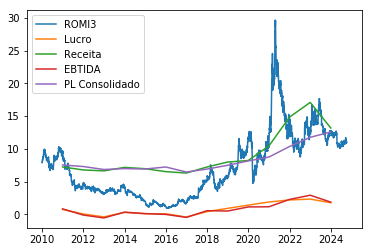

In [26]:
ticker='ROMI3'

ticker_num = convert_ticker_to_number(ticker)
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)

lucro = dados.loc[dados['CD_CONTA']=='3.09']
receita = dados.loc[dados['CD_CONTA']=='3.01']
ebtida=dados.loc[dados['CD_CONTA']=='3.05']
passivo=dados_bpp.loc[dados_bpp['CD_CONTA']=='2']
ativo=dados_bpa.loc[dados_bpa['CD_CONTA']=='1']
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']

stock_ticker = yf.download(ticker+'.SA', start=data_ini, end=data_fim)

# Set the index to a datetime type
stock_ticker.index = pd.to_datetime(stock_ticker.index)

plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(lucro['DT_REFER'],lucro['VL_CONTA']*1000/take_number_shares(ticker),label='Lucro')
plt.plot(receita['DT_REFER'],receita['VL_CONTA']*1000/take_number_shares(ticker),label='Receita')
plt.plot(ebtida['DT_REFER'],ebtida['VL_CONTA']*1000/take_number_shares(ticker),label='EBTIDA')
# plt.plot(ativo['DT_REFER'],ativo['VL_CONTA']*1000/take_number_shares(ticker),label='Ativo')
plt.plot(pl_cons['DT_REFER'],pl_cons['VL_CONTA']*1000/take_number_shares(ticker),label='PL Consolidado')
plt.legend(loc='upper left')

In [27]:
data_frames = [stock_ticker['Open'].rename(ticker),lucro['VL_CONTA'].rename('Lucro')*1000/take_number_shares(ticker), receita['VL_CONTA'].rename('Receita')*1000/take_number_shares(ticker),passivo['VL_CONTA'].rename('Passivo')*1000/take_number_shares(ticker)]

In [28]:
# from functools import reduce
# df_corr_pre = reduce(lambda  left,right: pd.merge(left,right,on=['Date'],
#                                             how='inner'), data_frames)
# corr=df_corr_pre.corr(method='spearman').round(2)
# corr.style.background_gradient(cmap='coolwarm')

[*********************100%***********************]  1 of 1 completed


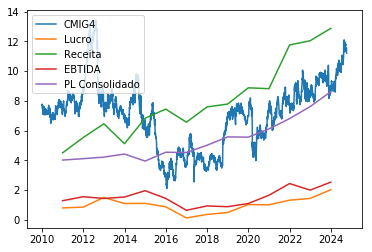

In [35]:
ticker='CMIG4'

ticker_num = convert_ticker_to_number(ticker)
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)

lucro = dados.loc[dados['CD_CONTA']=='3.09']
receita = dados.loc[dados['CD_CONTA']=='3.01']
ebtida=dados.loc[dados['CD_CONTA']=='3.05']
passivo=dados_bpp.loc[dados_bpp['CD_CONTA']=='2']
ativo=dados_bpa.loc[dados_bpa['CD_CONTA']=='1']
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']

stock_ticker = yf.download(ticker+'.SA', start=data_ini, end=data_fim)

# Set the index to a datetime type
stock_ticker.index = pd.to_datetime(stock_ticker.index)

plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(lucro['DT_REFER'],lucro['VL_CONTA']*1000/take_number_shares(ticker),label='Lucro')
plt.plot(receita['DT_REFER'],receita['VL_CONTA']*1000/take_number_shares(ticker),label='Receita')
plt.plot(ebtida['DT_REFER'],ebtida['VL_CONTA']*1000/take_number_shares(ticker),label='EBTIDA')
# plt.plot(ativo['DT_REFER'],ativo['VL_CONTA']*1000/take_number_shares(ticker),label='Ativo')
plt.plot(pl_cons['DT_REFER'],pl_cons['VL_CONTA']*1000/take_number_shares(ticker),label='PL Consolidado')
plt.legend(loc='upper left')

[*********************100%***********************]  1 of 1 completed


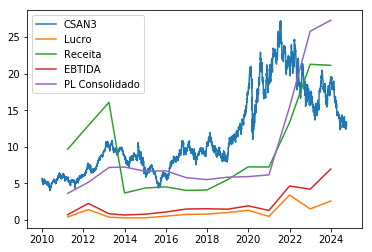

In [41]:
ticker='CSAN3'

ticker_num = convert_ticker_to_number(ticker)
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)

lucro = dados.loc[dados['CD_CONTA']=='3.09']
receita = dados.loc[dados['CD_CONTA']=='3.01']
ebtida=dados.loc[dados['CD_CONTA']=='3.05']
passivo=dados_bpp.loc[dados_bpp['CD_CONTA']=='2']
ativo=dados_bpa.loc[dados_bpa['CD_CONTA']=='1']
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']

stock_ticker = yf.download(ticker+'.SA', start=data_ini, end=data_fim)

# Set the index to a datetime type
stock_ticker.index = pd.to_datetime(stock_ticker.index)

plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(lucro['DT_REFER'],lucro['VL_CONTA']*1000/take_number_shares(ticker),label='Lucro')
plt.plot(receita['DT_REFER'],receita['VL_CONTA']*1000/take_number_shares(ticker),label='Receita')
plt.plot(ebtida['DT_REFER'],ebtida['VL_CONTA']*1000/take_number_shares(ticker),label='EBTIDA')
# plt.plot(ativo['DT_REFER'],ativo['VL_CONTA']*1000/take_number_shares(ticker),label='Ativo')
plt.plot(pl_cons['DT_REFER'],pl_cons['VL_CONTA']*1000/take_number_shares(ticker),label='PL Consolidado')
plt.legend(loc='upper left')

[*********************100%***********************]  1 of 1 completed


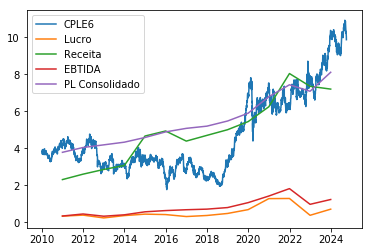

In [33]:
ticker='CPLE6'

ticker_num = convert_ticker_to_number(ticker)
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)

lucro = dados.loc[dados['CD_CONTA']=='3.09']
receita = dados.loc[dados['CD_CONTA']=='3.01']
ebtida=dados.loc[dados['CD_CONTA']=='3.05']
passivo=dados_bpp.loc[dados_bpp['CD_CONTA']=='2']
ativo=dados_bpa.loc[dados_bpa['CD_CONTA']=='1']
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']

stock_ticker = yf.download(ticker+'.SA', start=data_ini, end=data_fim)

# Set the index to a datetime type
stock_ticker.index = pd.to_datetime(stock_ticker.index)

plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(lucro['DT_REFER'],lucro['VL_CONTA']*1000/take_number_shares(ticker),label='Lucro')
plt.plot(receita['DT_REFER'],receita['VL_CONTA']*1000/take_number_shares(ticker),label='Receita')
plt.plot(ebtida['DT_REFER'],ebtida['VL_CONTA']*1000/take_number_shares(ticker),label='EBTIDA')
# plt.plot(ativo['DT_REFER'],ativo['VL_CONTA']*1000/take_number_shares(ticker),label='Ativo')
plt.plot(pl_cons['DT_REFER'],pl_cons['VL_CONTA']*1000/take_number_shares(ticker),label='PL Consolidado')
plt.legend(loc='upper left')

[*********************100%***********************]  1 of 1 completed


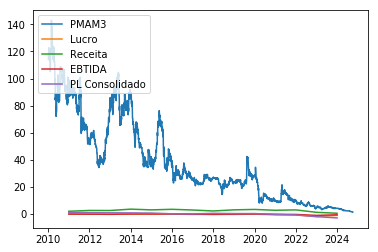

In [34]:
ticker='PMAM3'

ticker_num = convert_ticker_to_number(ticker)
dados = pega_dre(ticker_num)
dados_bpp=pega_bpp(ticker_num)

lucro = dados.loc[dados['CD_CONTA']=='3.09']
receita = dados.loc[dados['CD_CONTA']=='3.01']
ebtida=dados.loc[dados['CD_CONTA']=='3.05']
passivo=dados_bpp.loc[dados_bpp['CD_CONTA']=='2']
ativo=dados_bpa.loc[dados_bpa['CD_CONTA']=='1']
pl_cons=dados_bpp.loc[dados_bpp['CD_CONTA']=='2.03']

stock_ticker = yf.download(ticker+'.SA', start=data_ini, end=data_fim)

# Set the index to a datetime type
stock_ticker.index = pd.to_datetime(stock_ticker.index)

plt.plot(stock_ticker.index,stock_ticker['Open'],label=ticker)
plt.plot(lucro['DT_REFER'],lucro['VL_CONTA']*1000/take_number_shares(ticker),label='Lucro')
plt.plot(receita['DT_REFER'],receita['VL_CONTA']*1000/take_number_shares(ticker),label='Receita')
plt.plot(ebtida['DT_REFER'],ebtida['VL_CONTA']*1000/take_number_shares(ticker),label='EBTIDA')
# plt.plot(ativo['DT_REFER'],ativo['VL_CONTA']*1000/take_number_shares(ticker),label='Ativo')
plt.plot(pl_cons['DT_REFER'],pl_cons['VL_CONTA']*1000/take_number_shares(ticker),label='PL Consolidado')
plt.legend(loc='upper left')

In [33]:
pl_cons

,DT_REFER,DENOM_CIA,CD_CONTA,DS_CONTA,VL_CONTA,Ano
45825,2010-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,310223300.0,2010
124519,2011-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,332223611.0,2011
202346,2012-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,345433653.0,2012
279244,2013-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,349333684.0,2013
353921,2014-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,310722000.0,2014
427949,2015-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,257930000.0,2015
502086,2016-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,252743000.0,2016
575858,2017-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,269609000.0,2017
651029,2018-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,283543000.0,2018
734279,2019-12-31,PETROLEO BRASILEIRO S.A. PETROBRAS,2.03,Patrimônio Líquido Consolidado,299137000.0,2019


In [31]:
lucro

,DT_REFER,DENOM_CIA,CD_CONTA,DS_CONTA,VL_CONTA,Ano
23714,2010-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,295754.0,2010
50060,2011-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,344023.0,2011
75832,2012-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,302357.0,2012
101264,2013-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,292117.0,2013
126333,2014-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,224070.0,2014
151256,2015-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,89083.0,2015
176276,2016-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,222546.0,2016
201162,2017-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,82112.0,2017
225898,2018-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,190947.0,2018
253189,2019-12-31,MARCOPOLO S.A.,3.09,Resultado Líquido das Operações Continuadas,212029.0,2019


In [33]:
len(passivo)

14

In [34]:
len(lucro)

14

In [37]:
lucro['VL_CONTA'].dtypes

dtype('float64')

In [55]:
dif['VL_CONTA']

0     2733847.0
1     3037108.0
2     3209718.0
3     3825723.0
4     4214495.0
5     4949780.0
6     4745723.0
7     4650140.0
8     4956757.0
9     4981649.0
10    5770204.0
11    6296152.0
12    6958548.0
13    7148492.0
Name: VL_CONTA, dtype: float64